<a href="https://colab.research.google.com/github/panchalaman/clanguage/blob/main/Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:

The performance of students heavily rely on their surroundings, demographics and how well they prepare for a specific test. The preparation not only helps a student to achieve good grades but also provides a conceptual understanding of the topics which are paramount in the growth of their learning curve.

####Targeted Audience:
This report has been curated for decision makers, education experts, data scientists and educational institutes.

####Data Overview:
I have chosen this dataset which includes the performance of a student in high school for the subject mathematics. In which, the grades and demographics details exists. The collection of data has been retrieved from three different high schools in the United States. The dataset itself is well-curated and clean.
####Objectives:
I will utilize a variety of data visualisation tools to reach the conclusion for these research questions:
1.  How effective is a preparatory course impacts a stundent's performance?
2.  What are the major factors affecting the outcome of the tests?
3.  What are the best possible solutions to reach the best outcomes in the tests?


In [39]:
#Intalling libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno as msno
import io
from math import ceil

url = 'https://raw.githubusercontent.com/panchalaman/datavisualisation/main/exam_score.csv' # url path from github repository
df = pd.read_csv(url) #To reach the csv file retrieved from the url
df.head(5) # To show first 5 rows of the dataset

,gender,race/ethnicity,parent qualification,diet,test preparatory course,maths score,reading score,writing score
0,female,group D,some college,standard,none,71,73,78
1,male,group C,some college,standard,completed,89,88,88
2,male,group C,associate's degree,standard,none,96,85,84
3,male,group D,high school,standard,completed,92,96,94
4,female,group C,some high school,free/reduced,none,57,61,61


In [32]:
df.info() # To retrieve a brief data overview and its information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   race/ethnicity           1000 non-null   object
 2   parent qualification     1000 non-null   object
 3   diet                     1000 non-null   object
 4   test preparatory course  1000 non-null   object
 5   maths score              1000 non-null   int64 
 6   reading score            1000 non-null   int64 
 7   writing score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [33]:
df.describe() #All the neccesary values

,maths score,reading score,writing score
count,1000.000000,1000.000000,1000.00000
mean,67.420000,69.750000,68.39000
std,14.988204,14.484105,15.41225
min,26.000000,26.000000,17.00000
25%,57.000000,60.000000,58.00000
50%,67.000000,71.000000,69.00000
75%,78.000000,80.000000,79.00000
max,100.000000,100.000000,100.00000


# Preprocessing:
For effective data visualisation, the null values must be handled and cleaned.
Steps which should be taken:
1. Checking for Null Values in the dataset
2. Cleaning the data by renaming the columns with appropriate names.
3. Adding one column named 'average' for average marks.


In [34]:
null_values = df.isnull().sum() # to check null values
print(null_values)

gender                     0
race/ethnicity             0
parent qualification       0
diet                       0
test preparatory course    0
maths score                0
reading score              0
writing score              0
dtype: int64


In [35]:
df.rename(columns={'race/ethnicity': 'Group', 'parent qualification': 'ParentsQualification', 'test preparatory course': 'PreparatoryCourse', 'gender': ' Gender'}, inplace=True) # Renaming the columns with appropriate names
df['Group']=df['Group'].str.replace('group', '') #To remove the 'group' word
df['ParentsQualification']= df['ParentsQualification'].str.replace('some college','undergraduate') #To replace the 'ParentsQualification' word to 'undergraduate' to match the category
df['average']=((df['maths score']+ df['reading score']+df['writing score'])/3).apply(ceil)
df
df.head(5) # diplay first 5 rows

,Gender,Group,ParentsQualification,diet,PreparatoryCourse,maths score,reading score,writing score,average
0,female,D,undergraduate,standard,none,71,73,78,74
1,male,C,undergraduate,standard,completed,89,88,88,89
2,male,C,associate's degree,standard,none,96,85,84,89
3,male,D,high school,standard,completed,92,96,94,94
4,female,C,some high school,free/reduced,none,57,61,61,60


# Visualisation:

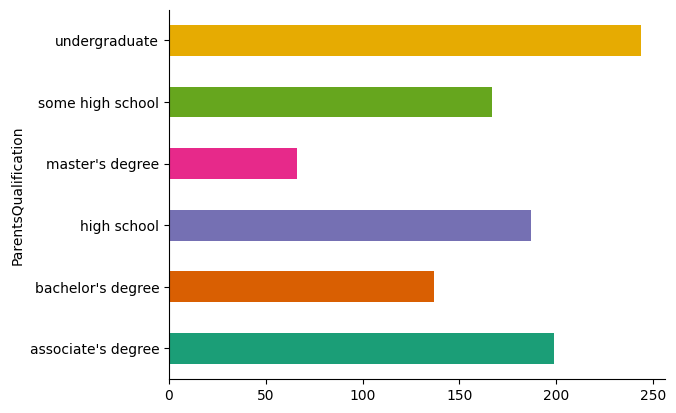

In [36]:
df.groupby('ParentsQualification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###Types of score for each column

####Distribution:

In [40]:
#Defining features and score columns
features = ["Gender", "Group", "ParentsQualification", "diet", "PreparatoryCourse"]
score_columns = ["maths score", "reading score", "writing score", "average"]
def bias_col_scr(scr_type):
  fig, ax = plt.subplot(2, 3, figsize =(20,8))

  #iteration through columns
  for i, feature in enumerate (features):
    row = i // 3
    col = i%3

    #plot for each category
    for value in df[feature].value_counts().index:
      sns.kdeplot(
          data=df[df[feature] ==value],
          x=scr_type,
          full=True,
          label= value,
          ax= ax[row][col]
      )

      # Legend
      ax[row][col].legend()

      #Title
      ax[row][col].set_title(f"Distributon of {scr_type} by {feature}")

      #adjust the layout
      plt.tight_layout()
      plt.show()


In [41]:
#including features list with column names which will be utilized for data visualisation
features = ["Gender", "Group", "ParentsQualification", "diet", "PreparatoryCourse", "maths score", "reading score", "writing score"]

#bias_col_scr_2 function with scr_type and data for plotting, 'figsize' for resolution
def bias_col_scr_2(scr_type,data):
  fig, axes= plt.subplots(len(features) // 3, 3, figsize=(15, 8 * (len(features) // 3)))
  axes = axes.flatten()
#sns.barplot() for creating bar plot from columns in features list
#ax for plotting parameters
#ax.text() for titles, y-axis limits, and mean value representation on top of each bar
#plt.tight_layout for layout adjustment
#plt.show() to display the figure

  for i, feature in enumerate(features):
    ax=axes[i]
    sns.barplot(x=feature, y=scr_type, data=data, ax = ax)
    ax.set_title(f"Average {scr_type} by {feature}")
    ax.set_ylim(60, 80)

    for p in ax.patches:
      height= p.get_height()
      ax.text(p.get_x() + p.get_width()/ 2, height + 0.5, f"{height:.1f}", ha="center", va="bottom", size=12)

  plt.show()